# Model Selection

## Setup

In [3]:
cd ../..

/Users/ali/Documents/tomfoolery/oleorcarl


In [4]:
# imports

import numpy as np
import pandas as pd
from matplotlib import pyplot as plt, lines

from sklearn.model_selection import GridSearchCV, RepeatedKFold
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC, LinearSVC

from src.classifier import get_vectors_and_labels
from src.settings import GRID_SEARCH_RESULTS_PATH

In [8]:
# defining the search area

LINEAR_GRID_SIZE = 20
RBF_GRID_SIZE = 20
CV = RepeatedKFold(n_repeats=5, n_splits=5, random_state=12345)

PARAMS = [
    {
        "svc__kernel": ["rbf"],
        "svc__gamma": (rbf_g_values := np.logspace(-7, -1, num=RBF_GRID_SIZE)),
        "svc__C": (rbf_c_values := np.logspace(-2, 8, num=RBF_GRID_SIZE)),
    },
    {
        "svc": [LinearSVC(dual=False, fit_intercept=False)],
        "svc__C": (linear_c_values := np.logspace(-5, 11, num=LINEAR_GRID_SIZE)),
    }
]

pipeline = make_pipeline(StandardScaler(), SVC())

In [3]:
# matplotlib setup

## Grid Search

In [176]:
# running the search

X, y = get_vectors_and_labels()

# this next step takes a while
raw_results = pd.DataFrame(
    GridSearchCV(
        estimator=pipeline,
        param_grid=PARAMS,
        cv=CV,
        n_jobs=-1,  # use all available cores
        refit=False,
        return_train_score=True,
    )
    .fit(X, y)
    .cv_results_
)

In [177]:
# cleaning up and saving results

results = raw_results[
    [
        "mean_test_score",
        "mean_train_score",
        "mean_fit_time",
        "param_svc__C",
        "param_svc__gamma",
        "param_svc__kernel",
    ]
].sort_values(["mean_test_score"], ascending=False)

results["param_svc__kernel"].fillna("linear", inplace=True)
results.to_csv(GRID_SEARCH_RESULTS_PATH)

results

,mean_test_score,mean_train_score,mean_fit_time,param_svc__C,param_svc__gamma,param_svc__kernel
113,0.661749,0.789791,0.066192,4.281332,0.001274,rbf
132,0.657563,0.787356,0.064459,14.384499,0.000616,rbf
94,0.656177,0.780916,0.062595,1.274275,0.002637,rbf
114,0.655482,0.894607,0.069280,4.281332,0.002637,rbf
150,0.655247,0.747332,0.062478,48.329302,0.000144,rbf
...,...,...,...,...,...,...
37,0.577758,0.577728,0.075067,0.033598,0.023357,rbf
36,0.577758,0.577728,0.068922,0.033598,0.011288,rbf
258,0.577758,1.000000,0.085062,20691.380811,0.048329,rbf
259,0.577758,1.000000,0.088582,20691.380811,0.1,rbf


In [191]:
results.sort_values("mean_fit_time", ascending=False)

,mean_test_score,mean_train_score,mean_fit_time,param_svc__C,param_svc__gamma,param_svc__kernel
385,0.625537,0.852842,184.166006,100000000.0,0.000004,rbf
365,0.632047,0.861717,105.582064,29763514.416313,0.000004,rbf
345,0.640855,0.881267,70.345883,8858667.904101,0.000004,rbf
384,0.647584,0.777611,41.812347,100000000.0,0.000002,rbf
364,0.643404,0.778423,30.357690,29763514.416313,0.000002,rbf
...,...,...,...,...,...,...
404,0.628982,0.725522,0.059050,0.023357,NaN,linear
403,0.635502,0.721636,0.030776,0.00336,NaN,linear
402,0.626692,0.698897,0.013386,0.000483,NaN,linear
401,0.601878,0.651972,0.011404,0.00007,NaN,linear


## Plotting results

In [40]:
results = pd.read_csv(GRID_SEARCH_RESULTS_PATH, index_col=0)

linear_results = (
    results[results.param_svc__kernel == "linear"]
    .set_index(["param_svc__C"])
    .sort_index()
)

rbf_results = (
    results[results.param_svc__kernel == "rbf"]
    .set_index(["param_svc__gamma", "param_svc__C"])
    .sort_index()
)

results

,mean_test_score,mean_train_score,mean_fit_time,param_svc__C,param_svc__gamma,param_svc__kernel
113,0.661749,0.789791,0.066192,4.281332,1.274275e-03,rbf
132,0.657563,0.787356,0.064459,14.384499,6.158482e-04,rbf
94,0.656177,0.780916,0.062595,1.274275,2.636651e-03,rbf
114,0.655482,0.894607,0.069280,4.281332,2.636651e-03,rbf
150,0.655247,0.747332,0.062478,48.329302,1.438450e-04,rbf
...,...,...,...,...,...,...
37,0.577758,0.577728,0.075067,0.033598,2.335721e-02,rbf
36,0.577758,0.577728,0.068922,0.033598,1.128838e-02,rbf
258,0.577758,1.000000,0.085062,20691.380811,4.832930e-02,rbf
259,0.577758,1.000000,0.088582,20691.380811,1.000000e-01,rbf


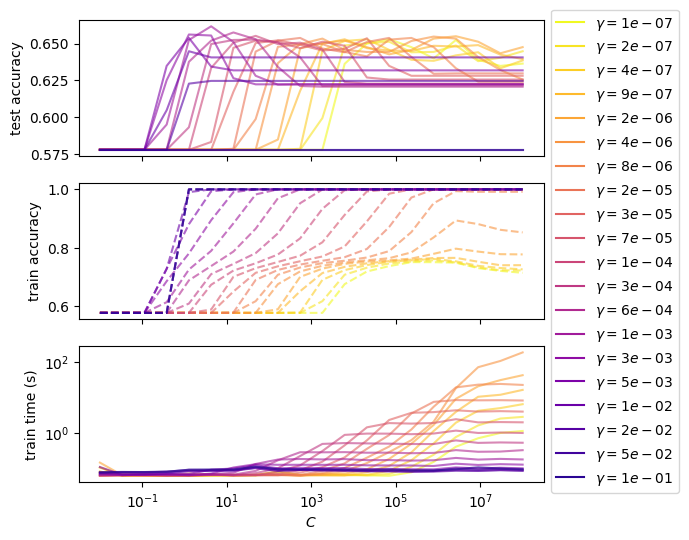

In [42]:
fig, (ax1, ax2, ax3) = plt.subplots(3, 1, sharex=True, figsize=(6, 6))


ax3.set_xlabel("$C$")

ax1.set_ylabel("test accuracy")
ax2.set_ylabel("train accuracy")
ax3.set_ylabel("train time (s)")

cmap = plt.cm.plasma_r
colors = [
    cmap(int(i / (RBF_GRID_SIZE) * cmap.N))
    for i in range(RBF_GRID_SIZE)
]  # fmt: skip

gs = rbf_results.index.levels[0]
cs = rbf_results.index.levels[1]

# plot accuracy scores
for i, g in enumerate(gs):
    ax1.plot(cs,
        rbf_results.loc[g][["mean_test_score"]],
        color=colors[i],
        alpha=0.6,
    )
    ax2.plot(
        cs,
        rbf_results.loc[g][["mean_train_score"]],
        "--",
        color=colors[i],
        alpha=0.6,
    )
    ax3.plot(
        cs,
        rbf_results.loc[g][["mean_fit_time"]],
        color=colors[i],
        alpha=0.6,
    )


ax2.legend(
    handles=[
        lines.Line2D([0], [0], color=colors[i], label=f"$\gamma = {g:.0e}$")
        for i, g in enumerate(gs)
    ],
    loc="center left",
    bbox_to_anchor=(1, 0.5),
    ncol=1,
)

ax1.set_xscale("log")
ax2.set_xscale("log")
ax3.set_xscale("log")

ax3.set_yscale("log")


plt.show()


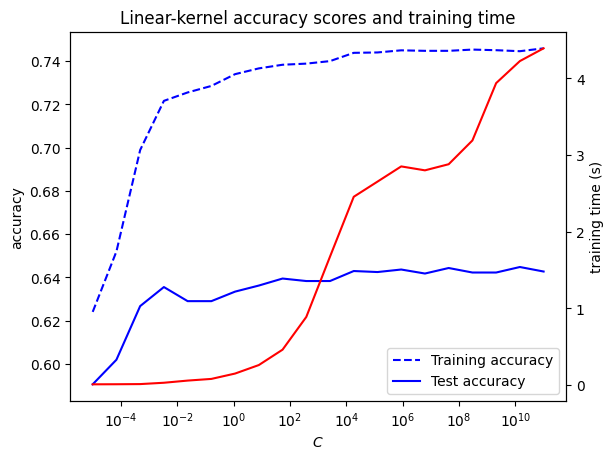

In [36]:
fig, ax1 = plt.subplots()
ax2 = ax1.twinx()  # second y-axis for training time

plt.title("Linear-kernel accuracy scores and training time")
ax1.set_xlabel("$C$")

ax1.set_ylabel("accuracy")
ax2.set_ylabel("training time (s)")
# ax2.set_yscale("log")

cs = linear_results.index

ax1.plot(cs, linear_results["mean_train_score"], "b--")[0].set_label("Training accuracy")
ax1.plot(cs, linear_results["mean_test_score"], "b-")[0].set_label("Test accuracy")
ax2.plot(cs, linear_results["mean_fit_time"], "r")[0]

plt.xscale("log")
ax1.legend()

plt.show()

In [47]:
linear_results.sort_values(["mean_test_score"], ascending=False)

,mean_test_score,mean_train_score,mean_fit_time,param_svc__gamma,param_svc__kernel
param_svc__C,,,,,
1.438450e+10,0.644773,0.744606,4.225584,NaN,linear
4.281332e+07,0.644311,0.744780,2.880571,NaN,linear
8.858668e+05,0.643612,0.745012,2.852014,NaN,linear
1.832981e+04,0.642917,0.743852,2.456102,NaN,linear
1.000000e+11,0.642685,0.745939,4.391938,NaN,linear
1.274275e+05,0.642445,0.744025,2.653632,NaN,linear
2.976351e+08,0.642226,0.745360,3.190471,NaN,linear
2.069138e+09,0.642222,0.745070,3.938183,NaN,linear
6.158482e+06,0.641756,0.744779,2.800751,NaN,linear
